In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from itertools import compress


### Load `MLWeedCropTrain.csv` training data

In [2]:
f = open('MLWeedCropTrain.csv')
content = np.array([float(s) for line in f.read().split('\n')[:-1] for s in line.split(',')]).reshape(1000, 14)

In [3]:
x = np.array([content[x,:][:-1] for x in range(len(content[:,0]))]).transpose()
y = np.array([content[x,:][-1] for x in range(len(content[:,0]))])

### Apply projection matrix obtained through PCA, from `projection_matrix.csv`

In [4]:
pca_matrix_f = open('projection_matrix.csv')
pca_matrix = np.array([float(s) for line in pca_matrix_f.read().split('\n')[:-1] for s in line.split(',')]).reshape(2,13)

In [5]:
z = np.matmul(pca_matrix, x)

### Scatter plot of transformed data

In [6]:
filter = y > 0
xs = [z[:,i][0] for i in range(len(z[0,:]))]
ys = [z[:,i][1] for i in range(len(z[0,:]))]
scatter_x_1 = list(compress(xs, filter))
scatter_y_1 = list(compress(ys, filter))
scatter_x_0 = list(compress(xs, np.invert(filter)))
scatter_y_0 = list(compress(ys, np.invert(filter)))


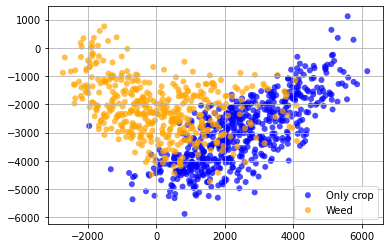

In [7]:
fig, ax = plt.subplots()
ax.scatter(scatter_x_1, scatter_y_1, c='blue', label='Only crop', alpha=0.7, edgecolors='none')
ax.scatter(scatter_x_0, scatter_y_0, c='orange', label='Weed', alpha=0.7, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()

Obviously looks like its possible to cluster

### Find best `K` for Kmeans clustering using elbow-method on WCSS

In [8]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init=x[:,0:i].transpose())
    kmeans.fit(x.transpose())
    inertia.append(kmeans.inertia_)


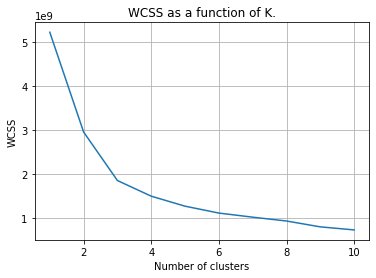

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('WCSS as a function of K.')
plt.grid()
plt.show()
plt.savefig('WCSS_K.png')

As suspected it was `K=2`.

In [10]:
kmeans = KMeans(n_clusters=2, init=x[:,0:2].transpose(), n_init=10)
Y = kmeans.fit_predict(x.transpose())
z_predicted = np.matmul(pca_matrix, kmeans.cluster_centers_.transpose()).transpose()

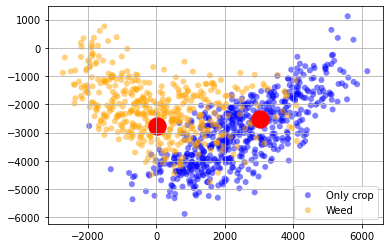

<Figure size 432x288 with 0 Axes>

In [11]:
fig, ax = plt.subplots()
ax.scatter(scatter_x_1, scatter_y_1, c='blue', label='Only crop', alpha=0.5, edgecolors='none')
ax.scatter(scatter_x_0, scatter_y_0, c='orange', label='Weed', alpha=0.5, edgecolors='none')
ax.scatter(z_predicted[:, 0], z_predicted[:, 1], s=300, c='red')
ax.legend()
ax.grid(True)
plt.show()
plt.savefig('clustering_plot.png')